# Setup

In [1]:
import sys
sys.path.append('/home/arnisaf/mp-tl-study')
from functions.visualization_utils import *

## Load Data

In [5]:
# load baselines: filename!!
with open('results/baselines_freeze_True_pool_True_lr_0.001_nice_curve.json', 'r') as f:
    baselines = json.load(f)
baselines = baselines[1:]

# load results; filename
with open('results/results_freeze_True_reinit_True_pool_True_lr_0.001_nice_curve.json', 'r') as f:
    results = json.load(f)

# Run this if the first element of the results is the PARAMS dict
params = results[0]
results = results[1:]
# if not, initialize a params dict -see 3. Init params

data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333


In [6]:
# Filter the baselines to these percentages: 0.001, 0.01, 0.1, 0.5, 1.0
# because there are some extra percentages
baselines = [result for result in baselines if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]

results = [result for result in results if result["sampled_percentage"] in [0.001, 0.01, 0.1, 0.5, 1.0]]
data_dicts = baselines + results 
# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333


In [7]:
df_empirical = df.copy()

In [4]:
df_other = df.copy()

In [17]:
# unfortunately we are missing one row in the reverse direction, so to run comparison between the regular classes and reverse direction run this cell
df_empirical = df_empirical.drop(79)

In [18]:
df_empirical

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.541667,0.178333
1,0.001,0.001,-1,1,0.541667,0.187500
2,0.001,0.001,-1,2,0.625000,0.217333
3,0.001,0.001,-1,3,0.291667,0.186333
4,0.001,0.001,-1,4,0.666667,0.240333
...,...,...,...,...,...,...
635,0.001,1.000,6,0,0.620983,0.580833
636,0.001,1.000,6,1,0.617383,0.579667
637,0.001,1.000,6,2,0.616678,0.577500
638,0.001,1.000,6,3,0.619387,0.579333


In [15]:
df_other

,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy
0,0.001,0.001,-1,0,0.7500,0.4143
1,0.001,0.001,-1,1,0.7500,0.3735
2,0.001,0.001,-1,2,0.6875,0.4083
3,0.001,0.001,-1,3,0.3125,0.2978
4,0.001,0.001,-1,4,0.3125,0.2855
...,...,...,...,...,...,...
634,0.001,1.000,6,0,0.8280,0.7865
635,0.001,1.000,6,1,0.8318,0.7873
636,0.001,1.000,6,2,0.8161,0.7850
637,0.001,1.000,6,3,0.8302,0.7855


In [33]:
# OR LOAD ARI Scores
"""with open("results_jsons/ari/ari_scores_finetuned_Fashion_to_MNIST.json", "r") as f:
    ari_scores_all = json.load(f)
df_ari = pd.DataFrame(ari_scores_all)

# Display the DataFrame (showing the first few rows for brevity)
df_ari.head()"""

# 1. The plots
See the documentation (mp-tl-study/example_visualizations.ipynb) for a full list of supported visualizations

### Experimental Plots

### First: df_empirical, main experiment, on the left

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


Freeze = True, Reinitialize = True, Pooling = True, Learning rate = 0.001


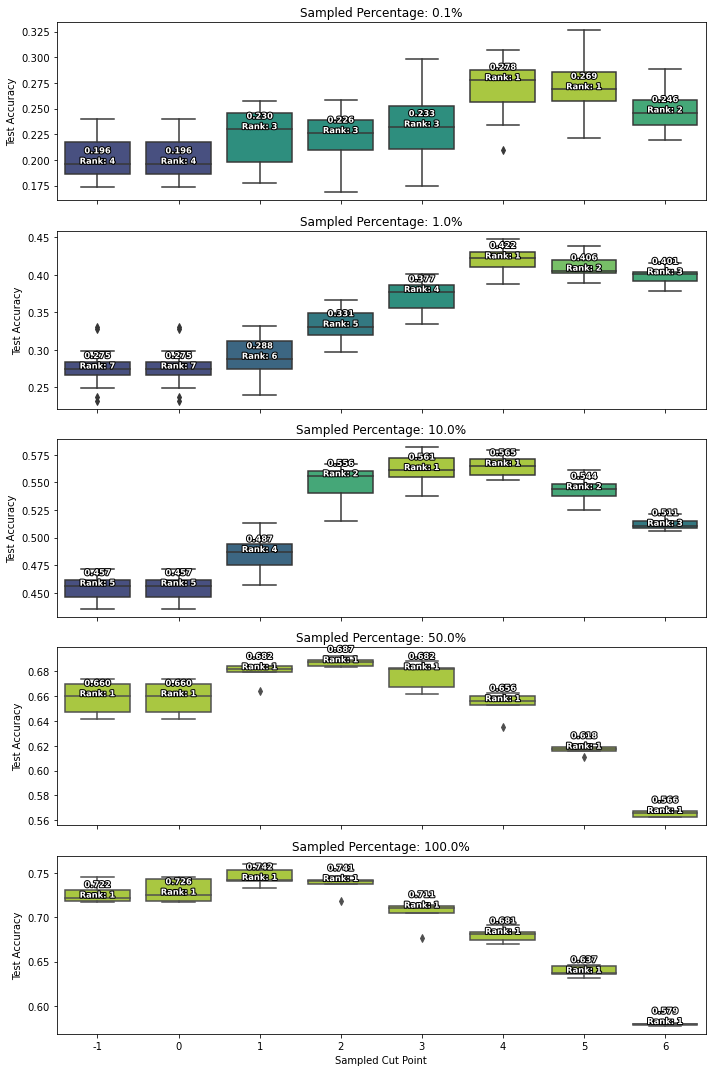

In [61]:
# run statistical tests below to get the df_rankings
_, df_rankings = pairwise_comparison(df=df_empirical)
ranks_sorted = box_plot(df=df_empirical, rank_df=df_rankings, params=params)

### Then: df_other, to be compared, on the right

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

Freeze = True, Reinitialize = True, Pooling = True, Learning rate = 0.001


<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

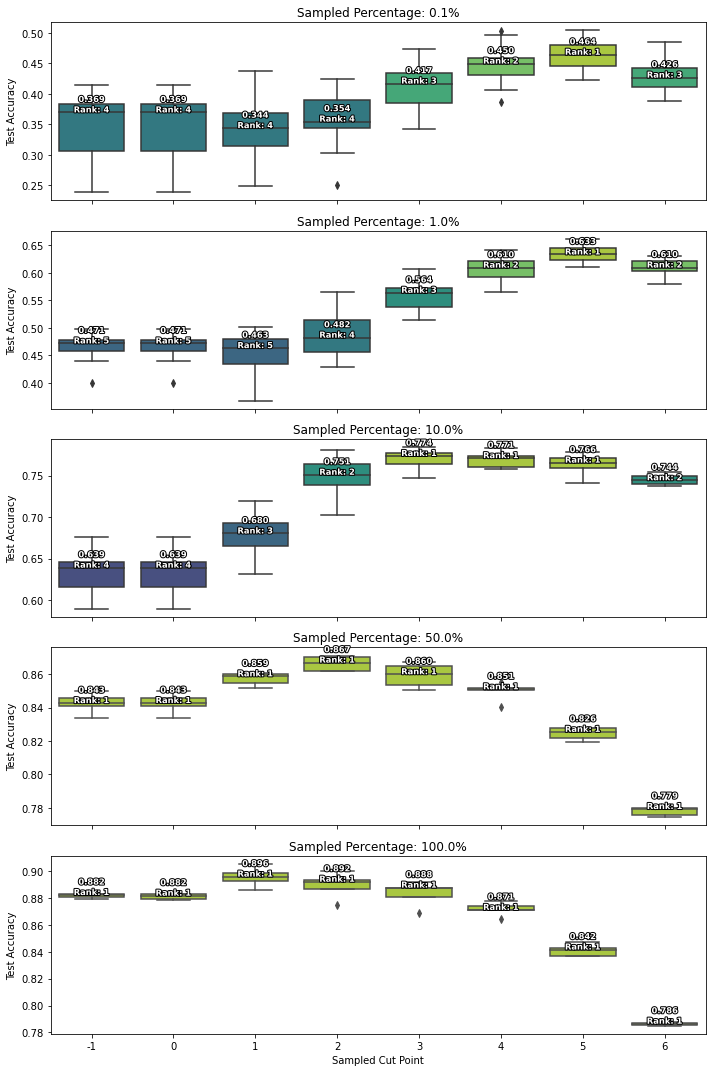

In [64]:
# run statistical tests below to get the df_rankings
_, df_rankings = pairwise_comparison(df=df_other)
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_other = df_other.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_other = stats_other.reset_index()
stats_other.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_other.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_other.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_other['rank'] = df_rankings_other['Mean Test Accuracy'].astype(int)
box_plot(df=df_other, rank_df=df_rankings, params=params, pairwise_rank_df=df_rankings_other, pairwise=False)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

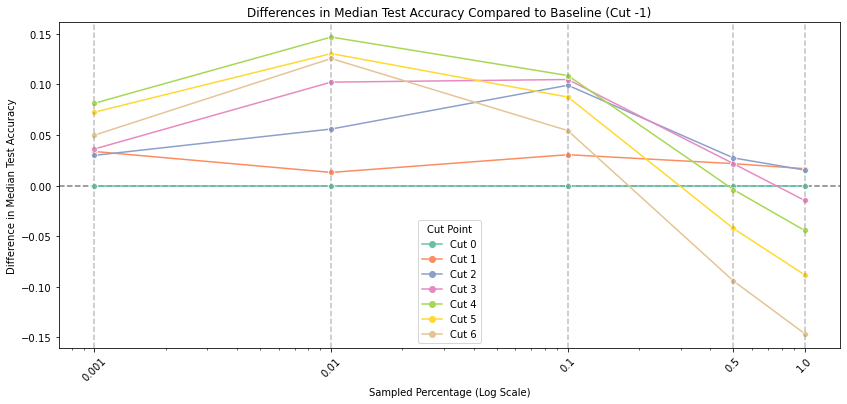

In [9]:
compare_to_baseline_line_plot(df)

<module 'matplotlib.pyplot' from '/opt/anaconda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

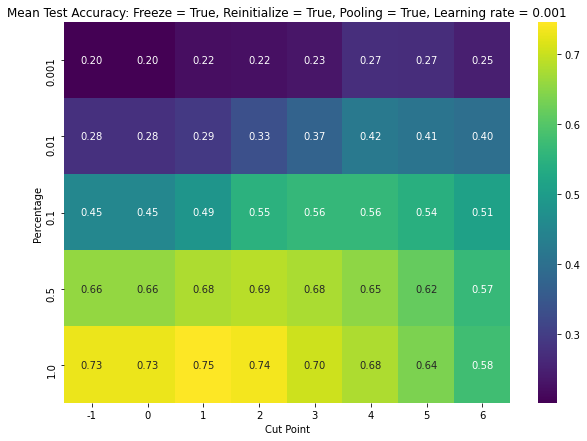

In [10]:
heatmap(df, params, figsize=(10,7))

# 2. Statistical Tests

### Pairwise Comparison between two plots

In [14]:
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)

In [15]:
stats_empirical = df_empirical.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_empirical = stats_empirical.reset_index()
stats_empirical.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

stats_other = df_other.groupby(['Percentage', 'Cut Point']).agg({
    'Test Accuracy': 'mean',  # Add more columns/statistics as needed
})
stats_other = stats_other.reset_index()
stats_other.rename(columns={'Test Accuracy': 'Mean Test Accuracy'}, inplace=True)

In [16]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2

df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > df_rankings_other.iloc[i]['Mean Test Accuracy']:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 8
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 1
        else:
            df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 1
            df_rankings_other.loc[i, 'Mean Test Accuracy'] = 8
    else:
        df_rankings_empirical.loc[i, 'Mean Test Accuracy'] = 5
        df_rankings_other.loc[i, 'Mean Test Accuracy'] = 5

df_rankings_empirical['rank'] = df_rankings_empirical['Mean Test Accuracy'].astype(int)
df_rankings_other['rank'] = df_rankings_other['Mean Test Accuracy'].astype(int)

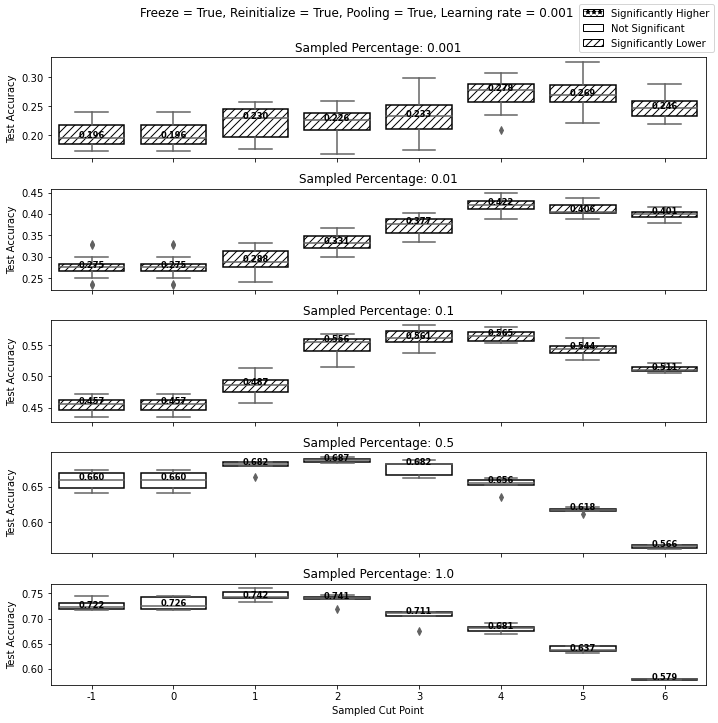

In [85]:
ranks_sorted = box_plot_percentages_experiments(df=df_empirical, rank_df=df_rankings_empirical, unique_ranks=np.array([1,5,8]), pairwise=True, color_palette="coolwarm", add_baseline=False, color_ranks=False, params=params)

In [29]:
cut_hatch_map = {6: '*', 5: '*', 4: '*', 3: '*', 2: '*', 1: '*', 0: '*', -1: '*'}
cuts = sorted(list(cut_hatch_map.keys()))

In [30]:
cuts

[-1, 0, 1, 2, 3, 4, 5, 6]

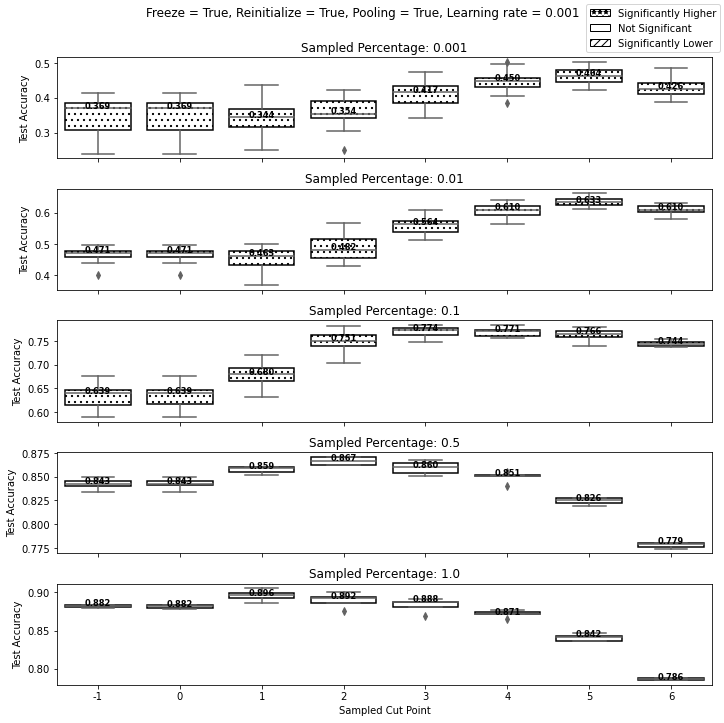

In [87]:
ranks_sorted = box_plot_percentages_experiments(df=df_other, rank_df=df_rankings_other, pairwise=True, unique_ranks=np.array([1,5,8]),  color_palette="coolwarm", add_baseline=False, color_ranks=False, params=params)

### Tables for Pairwise comparing plots

In [38]:
# create df_rankings_empirical and df_rankings_truncated, where if one is significantly different from each other we compare the mean_test_acc of both, and the one which is bigger is ranked 1, the lower is rank 3, and if they are not significantly different they ar eboth rank 2
df_wilcoxon_pairwise = pairwise_comparison_multiple_plots(df_empirical, df_other)
df_rankings_empirical = stats_empirical.copy()
df_rankings_other = stats_other.copy()

# in a for loop, compare the is_significant of two dataframes
for i in range(len(df_wilcoxon_pairwise)):
    if df_wilcoxon_pairwise.iloc[i]['is_significant']:
        if stats_empirical.iloc[i]['Mean Test Accuracy'] > stats_other.iloc[i]['Mean Test Accuracy']:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "regular"
        else:
            df_wilcoxon_pairwise.loc[i, "Higher"] = "reverse"
        # print(df_wilcoxon_pairwise)
    else:
        df_wilcoxon_pairwise.loc[i, "Higher"] = "None"

In [39]:
# every row: is the percentage and cut significantly different between the two box plots
df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
# print(latex_table)
# TODO: next, \text{p-value if significant}
# iterate over both the rows in the latex table string and the df_wilcoxon_pairwise
# if the row is significant, add the p-value to the latex table string
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        # split row with respect to " & ", take the 5th value, encapsulate it in \textbf{} and join them back
        row = row.split(" & ")
        # print(row)
        
        # row[4] = "\colorbox[HTML]{B2EAB1}{\\textbf{" + row[4].strip("\\") + "}}"
        # print(row)
        row = " & ".join([str(row[0]).lstrip()[:5]] + row[1:4] + row[-1:])
        row = "\\rowcolor{green!20}\n" + row
    else:
        row = row.split(" & ")
        row = " & ".join([str(row[0]).lstrip()[:5]] + row[1:4] + row[-1:])
    rows[i] = row

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

In [40]:
print(latex_table)

\rowcolor{green!20}
0.001 &         -1 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          0 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          1 &          1 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          2 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          3 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          4 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          5 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.001 &          6 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.010 &         -1 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.010 &          0 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.010 &          1 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.010 &          2 &          0 & 0.000000 &  reverse \\
\rowcolor{green!20}
0.010 &          3 &          0 & 0.000000 &  reverse \\

### Tables for Ranking Cuts

In [41]:
df_wilcoxon_pairwise, _ = pairwise_comparison(df=df_other, col="Test Accuracy")

df_wilcoxon_pairwise["statistic"] = df_wilcoxon_pairwise["statistic"].astype(int)

latex_table = df_wilcoxon_pairwise.to_latex(index=False, float_format="%.6f")
# print(latex_table)
# TODO: next, \text{p-value if significant}
# iterate over both the rows in the latex table string and the df_wilcoxon_pairwise
# if the row is significant, add the p-value to the latex table string
rows = latex_table.split("\n")[4:-3]
header = latex_table.split("\n")[:4]
footer = latex_table.split("\n")[-3:]

# iterate over the rows and the df_wilcoxon_pairwise
for i, row in enumerate(rows):
    if df_wilcoxon_pairwise.iloc[i]["is_significant"]:
        # split row with respect to " & ", take the 5th value, encapsulate it in \textbf{} and join them back
        row = row.split(" & ")
        
        # row[4] = "\colorbox[HTML]{B2EAB1}{\\textbf{" + row[4].strip("\\") + "}}"
        # print(row)
        row = " & ".join([str(row[0]).lstrip()[:5]] + row[1:-1])
        row = "\\rowcolor{green!20}\n" + row
    else:
        row = row.split(" & ")
        row = " & ".join([str(row[0]).lstrip()[:5]] + row[1:-1])
    rows[i] = row + " \\\\"

# join the header, rows and footer, putting a "\\" at the end of each row
latex_table = "\n".join(rows)

/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/opt/anaconda/lib/python3.7/site-packages/scipy/stats/morestats.py:2957: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if ther

In [42]:
print(latex_table)

0.001 &            0 &            1 &        155 & 0.853200 \\
0.001 &            0 &            2 &         96 & 0.122865 \\
\rowcolor{green!20}
0.001 &            0 &            3 &         25 & 0.000054 \\
\rowcolor{green!20}
0.001 &            0 &            4 &          1 & 0.000000 \\
\rowcolor{green!20}
0.001 &            0 &            5 &          0 & 0.000000 \\
\rowcolor{green!20}
0.001 &            0 &            6 &          0 & 0.000000 \\
0.001 &            1 &            2 &        133 & 0.441837 \\
\rowcolor{green!20}
0.001 &            1 &            3 &         33 & 0.000188 \\
\rowcolor{green!20}
0.001 &            1 &            4 &          2 & 0.000000 \\
\rowcolor{green!20}
0.001 &            1 &            5 &          0 & 0.000000 \\
\rowcolor{green!20}
0.001 &            1 &            6 &          0 & 0.000000 \\
\rowcolor{green!20}
0.001 &            2 &            3 &         33 & 0.000188 \\
\rowcolor{green!20}
0.001 &            2 &            4 &       